In [61]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison

In [77]:
# Importing data
# working with uploaded data files by making datasets folder in the repository 
df= pd.read_csv('datasets/HNT_TSW_Data.csv')
df.head(6)

,geno,trt,rep,TSW
0,Mercedes,Control,1,33.00
1,Mercedes,Control,2,34.55
2,Mercedes,Control,3,27.77
3,Mercedes,HNT,1,30.85
4,Mercedes,HNT,2,25.73
5,Mercedes,HNT,3,29.65


In [78]:
# Handling with missing values
df.isna().sum()

# filling NaNs with immediate front values
df = df.fillna(method='pad')

In [79]:
# Some useful properties of the datasets
print(df['geno'].unique())      # Genotypes
print(df['trt'].unique())       # Treatments
print(df['rep'].unique())       # Replications
print(df.shape) 

['Mercedes' 'Edimax CL' 'Popular' '46W94' 'Wichita' 'Riley' 'DKW44-10'
 'DKW46-15' 'HyCLASS225W' 'Hekip']
['Control' 'HNT']
[1 2 3]
(60, 4)


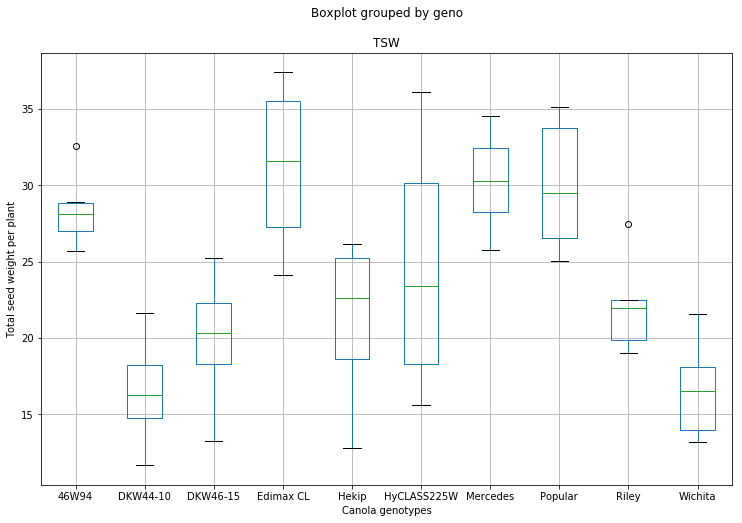

In [75]:
# Examine total seed weight using boxplots
# plt.figure(figsize=(12,8))
df_TSW_.boxplot(column='TSW', by= 'geno', figsize=(12,8))
plt.xlabel('Canola genotypes')
plt.ylabel('Total seed weight per plant')
plt.show()

In [76]:
# Anova with treatments, genotypes and their interactions
formula = 'TSW ~ C(geno) + C(trt) + C(geno)* C(trt)'
model = ols(formula,data= df_TSW_Ex1).fit()
anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(geno),9.0,1713.938267,190.437585,15.261340,2.217186e-10
C(trt),1.0,339.388167,339.388167,27.197983,5.950718e-06
C(geno):C(trt),9.0,208.209200,23.134356,1.853947,8.810097e-02
Residual,40.0,499.137267,12.478432,NaN,NaN


In [66]:
# Comparison of Means of total seed weight per plant between control and HNT treatments in canola genotypes 
mean_comparison= MultiComparison(df_HNT_TSW_Ex1['TSW'],df_HNT_TSW_Ex1['trt']).tukeyhsd(alpha=0.05)
print(mean_comparison)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1 group2 meandiff lower   upper  reject
---------------------------------------------
Control  HNT   -4.7567  -8.096 -1.4173  True 
---------------------------------------------


In [ ]:
# Create a histogram to show the variations in total seed weight between control and HNT in canola genotypes